In [8]:
import numpy as np
import time
from matplotlib import pyplot as plt
from tqdm import tqdm
from timeit import default_timer as timer
from scipy.optimize import curve_fit
import decimal


np.random.seed(404)

**Theoretic time complexity estimators**

In [6]:
def const_theor(x, a):
    return a * np.ones_like(x)

def linear_theor(x, a):
    return a * x

def quad_theor(x, a):
    return a * x ** 2

def cubic_theor(x, a):
    return a * x ** 3

def nlogn_theor(x, a):
    return a * x * np.log(x)

**Algorithms**

In [14]:
def const_fun(v):
    return 359

def sum_fun(v):
    res = 0
    for i in v:
        res += 1
    return res 

def prod_fun(v):
    res = 1
    for i in v:
        res *= i
    return res

def polynom_fun(v, x = 1.5):
    decimal.getcontext().prec = 100
    res = decimal.Decimal(0)
    for i in range(len(v)):
        res += decimal.Decimal(v[i]) * (decimal.Decimal(x) ** decimal.Decimal(i))
    return res

def polynom_dumb_fun(v, x = 1.5):
    decimal.getcontext().prec = 100
    res = decimal.Decimal(0)
    for i in range(len(v)):
        pw = decimal.Decimal(1)
        for a in range(i):
            pw *= decimal.Decimal(x)
        res += decimal.Decimal(v[i]) * pw ##(decimal.Decimal(x) ** decimal.Decimal(i))
    return res

def polynom_horner_fun(v, x = 1.5):
    res = decimal.Decimal(1)
    for i in reversed(range(len(v))):
        res *= decimal.Decimal(x)
        res += decimal.Decimal(v[i])
    return res
    
def bubblesort(v):
    for i in range(len(v) - 1):
        for j in range(0, len(v) - i - 1):
            if v[j] > v[j + 1]:
                v[j], v[j + 1] = v[j + 1], v[j]
    return v

In [5]:
def prepare(v, low, high):
    pivot = v[high]
    cur = low - 1
    
    for i in range(low, high):
        if v[i] <= pivot:
			      cur = cur + 1
			      (v[cur], v[i]) = (v[i], v[cur])
    (v[cur + 1], v[high]) = (v[high], v[cur + 1])
    return cur + 1

def quicksort_step(v, low, high):
	  if low < high:
		    pivot = prepare(v, low, high)
		    quicksort_step(v, low, pivot - 1)
		    quicksort_step(v, pivot + 1, high)

def quicksort(v):
	  quicksort_step(v, 0, len(v)-1)

In [6]:
MIN_MERGE = 32
 
def calcMinRun(n):
    r = 0
    while n >= MIN_MERGE:
        r |= n & 1
        n >>= 1
    return n + r
 
def insertionSort(arr, left, right):
    for i in range(left + 1, right + 1):
        j = i
        while j > left and arr[j] < arr[j - 1]:
            arr[j], arr[j - 1] = arr[j - 1], arr[j]
            j -= 1
 
def merge(arr, l, m, r):
    len1, len2 = m - l + 1, r - m
    left, right = [], []
    for i in range(0, len1):
        left.append(arr[l + i])
    for i in range(0, len2):
        right.append(arr[m + 1 + i])

    i, j, k = 0, 0, l

    while i < len1 and j < len2:
        if left[i] <= right[j]:
            arr[k] = left[i]
            i += 1
        else:
            arr[k] = right[j]
            j += 1
        k += 1
        
    while i < len1:
        arr[k] = left[i]
        k += 1
        i += 1
    while j < len2:
        arr[k] = right[j]
        k += 1
        j += 1
 
def timsort(arr):
    n = len(arr)
    minRun = calcMinRun(n)
    for start in range(0, n, minRun):
        end = min(start + minRun - 1, n - 1)
        insertionSort(arr, start, end)
    size = minRun
    while size < n:
        for left in range(0, n, 2 * size):
            mid = min(n - 1, left + size - 1)
            right = min((left + 2 * size - 1), (n - 1))
            if mid < right:
                merge(arr, left, mid, right)
        size = 2 * size

In [7]:
def mult_matrix(a, b):
    m = len(a)
    n = len(a[0])
    assert n == len(b)
    l = len(b[0])
    res = np.zeros((m, l))
    for i in range(m):
        for j in range(l):
            cur = 0
            for l in range(n):
                cur += a[i][l] * b[l][j]
            res[i][j] = cur
    return res

**Time measurements (average for set amount of runs)**

In [3]:
def avg_runs(runs, experiments, fun):
    times = []
    for i in range(runs):
        times.append([])
        for j in tqdm(range(1, experiments + 1)):
            v = np.random.rand(j)
            start_time = timer()
            fun(v)
            times[i].append(timer() - start_time)
            
    return np.array(times, dtype=np.float64).mean(axis=0)

In [4]:
def avg_runs_matrix(runs, experiments, fun):
    times = []
    for i in range(runs):
        times.append([])
        for j in tqdm(range(1, experiments + 1)):
            mat_a = np.random.rand(j, j)
            mat_b = np.random.rand(j, j)
            start_time = timer()
            fun(mat_a, mat_b)
            times[i].append(timer() - start_time)
            
    return np.array(times, dtype=np.float64).mean(axis=0)

**Plotting**

In [5]:
def plot(title, emp_time, estimator):
    if estimator == nlogn_theor:
        xdata = np.linspace(1, len(emp_time), len(emp_time)-1, dtype=np.float64)
        ydata = np.array(emp_time, dtype=np.float64)
        popt, _ = curve_fit(estimator, xdata, ydata[1:])
    else:
        xdata = np.arange(len(emp_time), dtype=np.float64)
        ydata = np.array(emp_time, dtype=np.float64)
        popt, _ = curve_fit(estimator, xdata, ydata)

    plt.plot(emp_time)
    plt.plot(xdata, estimator(xdata, *popt), 'r-',
             label='fit: a=%5.3f, ' % tuple(popt))
    plt.grid(True)
    plt.title(f"{title} time measurements")
    plt.legend(["Theoretical", "Empirical"])
    plt.show()

**Test runs and time comparison**

100%|██████████| 2000/2000 [00:00<00:00, 84662.43it/s]


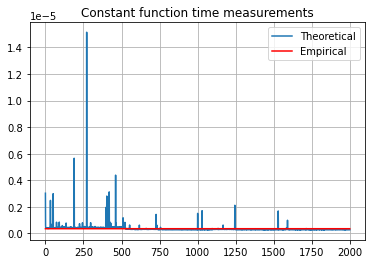

In [ ]:
avg_time = avg_runs(5, 2000, const_fun)
plot("Constant function", avg_time, const_theor)

100%|██████████| 2000/2000 [00:00<00:00, 6476.43it/s] 


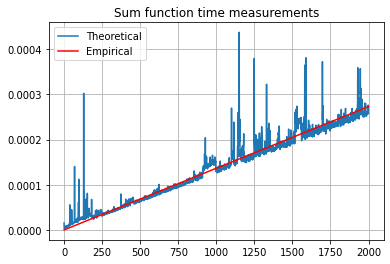

In [ ]:
avg_time = avg_runs(5, 2000, sum_fun)
plot("Sum function", avg_time, linear_theor)

100%|██████████| 2000/2000 [00:00<00:00, 3851.33it/s]


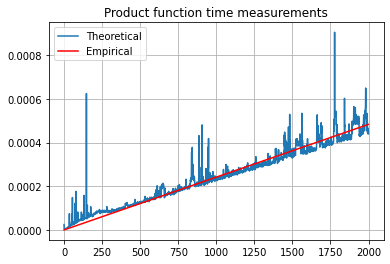

In [ ]:
avg_time = avg_runs(5, 2000, prod_fun)
plot("Product function", avg_time, linear_theor)

100%|██████████| 2000/2000 [00:10<00:00, 192.03it/s]


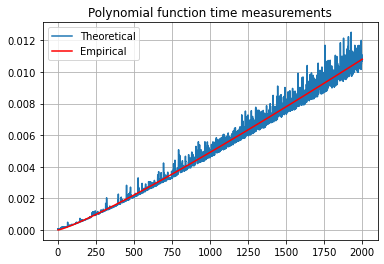

In [16]:
avg_time = avg_runs(5, 2000, polynom_fun)
plot("Polynomial function", avg_time, nlogn_theor)

100%|██████████| 500/500 [00:19<00:00, 25.98it/s]


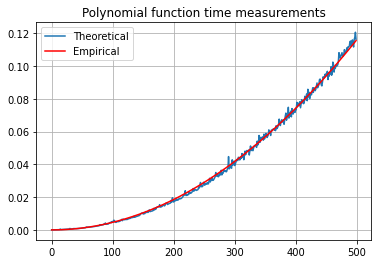

In [10]:
avg_time = avg_runs(5, 500, polynom_dumb_fun)
plot("Polynomial function", avg_time, quad_theor)

100%|██████████| 2000/2000 [00:05<00:00, 346.21it/s]


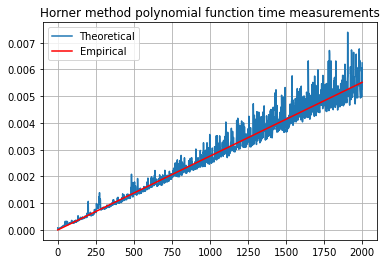

In [25]:
avg_time = avg_runs(5, 2000, polynom_horner_fun)
plot("Horner method polynomial function", avg_time, linear_theor)

100%|██████████| 600/600 [00:22<00:00, 27.03it/s]


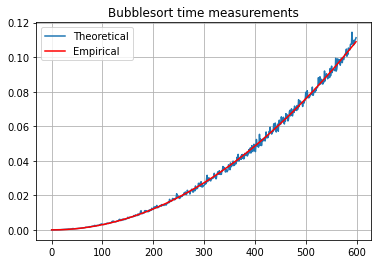

In [ ]:
avg_time = avg_runs(5, 600, bubblesort)
plot("Bubblesort", avg_time, quad_theor)

100%|██████████| 2000/2000 [00:12<00:00, 156.77it/s]


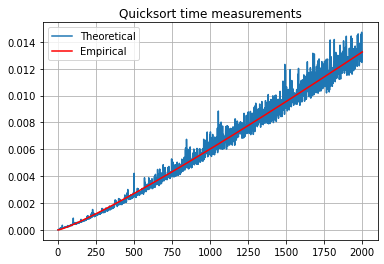

In [ ]:
avg_time = avg_runs(5, 2000, quicksort)
plot("Quicksort", avg_time, nlogn_theor)

100%|██████████| 2000/2000 [00:19<00:00, 100.17it/s]


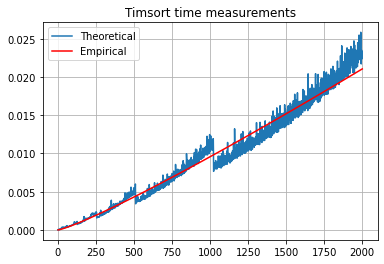

In [ ]:
avg_time = avg_runs(5, 2000, timsort)
plot("Timsort", avg_time, nlogn_theor)

100%|██████████| 200/200 [06:42<00:00,  2.01s/it]


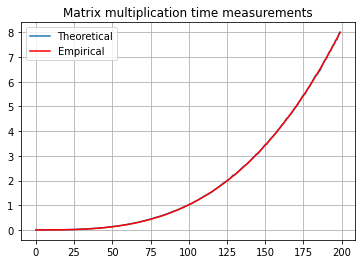

In [ ]:
avg_time = avg_runs_matrix(5, 200, mult_matrix)
plot("Matrix multiplication", avg_time, cubic_theor)